## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).


In [121]:
#importing all the important libraries like numpy. pandas, matlplolib, and warnings to keep notebook clean

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [122]:
# to suppress warnings

import warnings   
warnings.filterwarnings("ignore")

In [123]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [124]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [125]:
!ls "/content/drive/MyDrive/Advance Analytic Stats/"

'application_data (1).csv'   previous_application.csv
 columns_description.csv    'Problem Statement.gdoc'


In [126]:
path = "/content/drive/MyDrive/Advance Analytic Stats/"

# Application Data Analysis flow in this notebook
* Importing Module

* Reading the Dataset into Pandas Dataframe

* We have divided the features into small segments and anlyzed segment-wise using a smaller dataframe containing only relevant categories.

* Data Cleaning, Missing Data Handling are done segment-wise.

* Created plots for different segments.
* Top 10-correlation for defaulters & non-defaulters

## Importing the dataset

In [127]:
file_name = "application_data (1).csv"
application_df = pd.read_csv(f"{path}/{file_name}", encoding='cp1252')

In [128]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Understanding the data

In [129]:
application_df.shape

(307511, 122)

In [130]:
application_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA


*   There are 122 columns having various data types like object, int, float and 305711 rows.
*   app_data contains 121 features, 1 target variable, and 307511 rows
(Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)



## Checking the target column

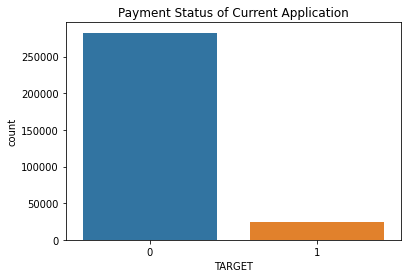

In [131]:
plt.title("Payment Status of Current Application")
sns.countplot(application_df['TARGET'])
plt.show()

In [134]:
application_df['TARGET'].value_counts()[0]/len(application_df)

0.9192711805431351

In [135]:
application_df['TARGET'].value_counts()[1]/len(application_df)

0.08072881945686496

* Comment: This data is highly imbalanced as number of defaulter is very less in total population. 

* Data Imbalance Ratio --> Defaulter : Non-Defaulter = 8 : 92 = 2 : 23

## Checking OTHER features

### 1. Lets check Documents Submitted by Applicant

In [147]:
# adding all flags coloumns in variable "flag_columns"

flag_columns = [col for col in application_df.columns if "FLAG_DOCUMENT" in col]

print(flag_columns)  # Viewing all FLAG columns

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


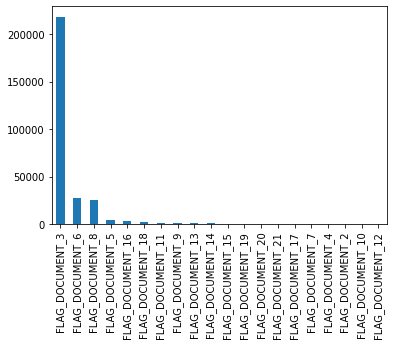

In [172]:
application_df[flag_columns].sum().sort_values(ascending=False).plot(kind='bar')

Insight:

* The heatmap suggests that all of the documents except Document 3 were not provided by applicants in majority of the cases.
* Hence we can assumen all the document (except document 3) will not contribute towards analyzing the data. Hence all this columns can be dropped.

#### Checking both defaulter and non-defaulter entries to identify importance of Document 3

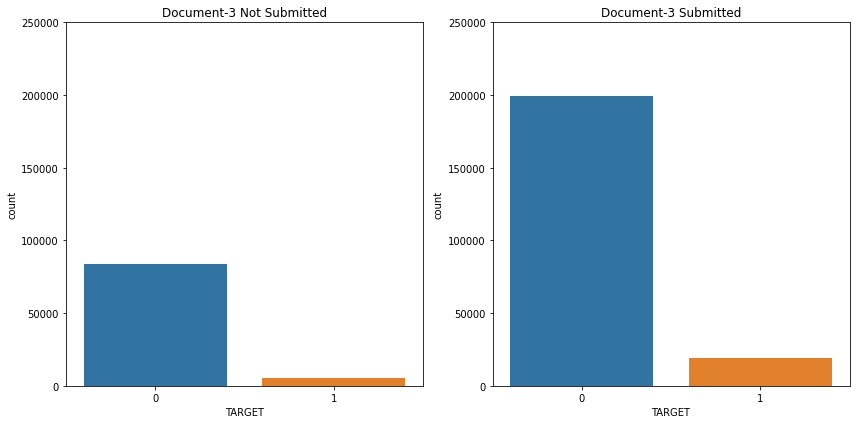

In [189]:
# Using equal ylim to for better visibilty

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title="Document-3 Not Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title="Document-3 Submitted")

sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.tight_layout()

plt.show()

Insight

* FLAG_DOCUMENT_3 is showing similar trend for both non-defaulters and defaulters.
* Hence, this column can be dropped

### 2. Lets check Housing Information of Applicant

In [149]:
starting_idx = application_df.columns.get_loc("APARTMENTS_AVG") 
ending_idx = application_df.columns.get_loc("EMERGENCYSTATE_MODE")
housing_df = application_df.iloc[:, starting_idx:ending_idx+1]
housing_df['TARGET'] = application_df["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = application_df["NAME_HOUSING_TYPE"]

In [150]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

###### -------> function for finding missing data

In [152]:
def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

###### -------> function for finding percentage of defaulter in specific column

In [156]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [153]:
housing_df_missing = missingdata_percentage(housing_df)
housing_df_missing.sort_values("percentage")

,category,percentage
46,EMERGENCYSTATE_MODE,47.398304
44,TOTALAREA_MODE,48.268517
2,YEARS_BEGINEXPLUATATION_AVG,48.781019
30,YEARS_BEGINEXPLUATATION_MEDI,48.781019
16,YEARS_BEGINEXPLUATATION_MODE,48.781019
35,FLOORSMAX_MEDI,49.760822
7,FLOORSMAX_AVG,49.760822
21,FLOORSMAX_MODE,49.760822
43,HOUSETYPE_MODE,50.176091
39,LIVINGAREA_MEDI,50.193326


Insight

* All of the features have very high (47-70%) missing data percentage. Hence all these features can be dropped.

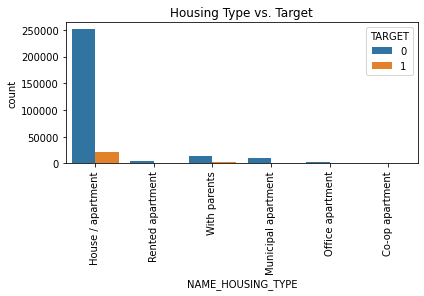

In [154]:
plt.figure()
sns.countplot(application_df["NAME_HOUSING_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [157]:
value_wise_defaulter_percentage(application_df, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


Insight:

* Applicants living with their parents or in rented apartment have higher rate of default.

### 3. Lets check Social Circle Info

In [158]:
start_idx = application_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_idx = application_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = application_df.iloc[:, start_idx:end_idx+1]
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


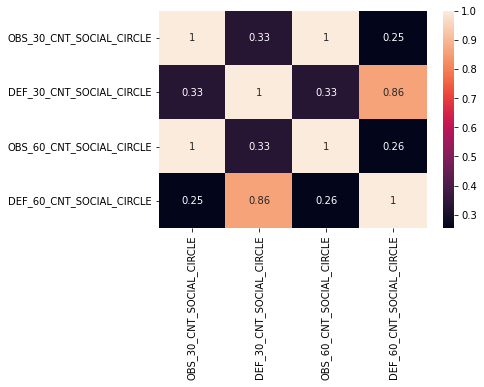

In [160]:
sns.heatmap(social_circle_df.corr(), annot=True)

Insight:

* DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
* we can drop any one of DEF_30_CNT_SOCIAL_CIRCLE or DEF_60_CNT_SOCIAL_CIRCLE
* OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns
* So, we can drop any one of OBS_30_CNT_SOCIAL_CIRCLE or OBS_60_CNT_SOCIAL_CIRCLE

### 4. Region related data

In [161]:
start_idx = application_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_df.iloc[:, start_idx:end_idx+1]
region_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']
region_df["TARGET"] = application_df["TARGET"]

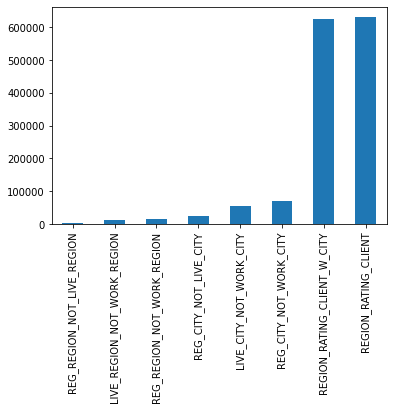

In [173]:
region_df.drop('TARGET',axis=1).sum().sort_values().plot(kind='bar')


* REG_REGION_NOT_LIVE_REGION mostly contains 0, hence can be removed
* REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed
* REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed
* 'REGION_RATING_CLIENT' & 'REGION_RATING_CLIENT_W_CITY' both are showing high value counts because its rating falls between [1,3].

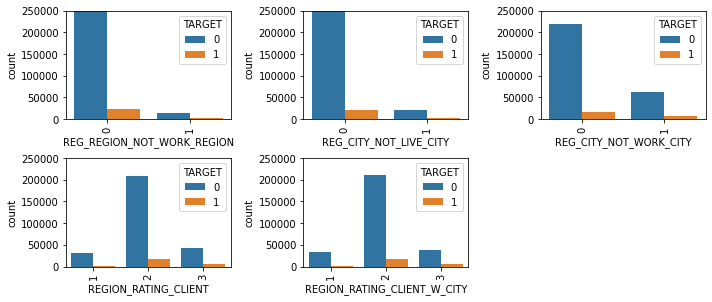

In [174]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

Insight:

* Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same
* Highest Applicants have Region rating of 2

### 5. Asset Details

In [175]:
application_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


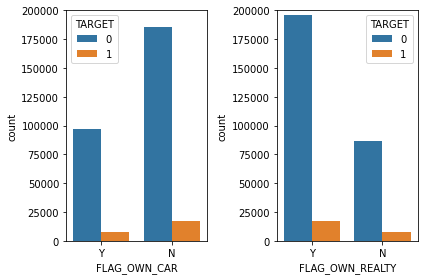

In [176]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(application_df['FLAG_OWN_CAR'], hue=application_df['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(application_df['FLAG_OWN_REALTY'], hue=application_df['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

In [177]:
value_wise_defaulter_percentage(application_df, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.243730


In [178]:
value_wise_defaulter_percentage(application_df, 'FLAG_OWN_REALTY')

,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


Insight:

* Most of the applicants own realty
* Most of the applicants do not own cars
* People who donot own car AND donot own realty have high default rate

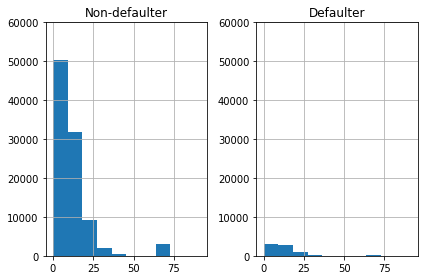

In [180]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

non_default  = application_df[application_df["TARGET"] == 0]
default  = application_df[application_df["TARGET"] == 1]

non_default['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
default['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()

* Defaulter or not, most applicants have car age between 0-25 years.
* Since for both target value, trend is similar, this feature can dropped

### Top 10 correlation for Defaulters

In [181]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998075
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997825
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997668
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997187
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.997032
ENTRANCES_MEDI            ENTRANCES_AVG               0.996700
dtype: float64

### Top 10 Correlation for Non-defaulters

In [182]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()
# Listing the correlations in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
COMMONAREA_AVG            COMMONAREA_MEDI             0.995857
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995568
APARTMENTS_AVG            APARTMENTS_MEDI             0.995163
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.994081
dtype: float64

Top 10 Correlations for Defaulters
  1. (OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE)
  2. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)
  3. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
  4. (COMMONAREA_MEDI, COMMONAREA_AVG)
  5. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
  6. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_AVG)
  7. (LIVINGAPARTMENTS_MEDI, LIVINGAPARTMENTS_AVG)
  8. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_MODE)
  9. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
  10. (ENTRANCES_AVG, ENTRANCES_MEDI)

Top 10 Correlations for Non-Defaulters
  1. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
  2. (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)
  3. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
  4. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
  5. (ENTRANCES_AVG, ENTRANCES_MEDI)
  6. (ELEVATORS_AVG, ELEVATORS_MEDI)
  7. (COMMONAREA_MEDI, COMMONAREA_AVG)
  8. (LIVINGAREA_AVG, LIVINGAREA_MEDI)
  9. (APARTMENTS_MEDI, APARTMENTS_AVG)
  10. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)